# Jupyter Notebook Visualisation

# Image Classifier and Test

# Evaluation Images 

### Importing needed tools

In [1]:
import skimage
import numpy as np
import matplotlib.pyplot as plt

### Creating Test Images

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.  85.  85.   0.   0.   0.
    0.]
 [  0.   0.   0.   0.   0.   0.   0.  90.  90.  89.  81.   0.   0.   0.
    0.]
 [  0.   0.   0.   0.   0.  80.  80.   0.   0.  93.  96.   0.   0.   0.
    0.]
 [  0.   0.   0.  50.  50.   0.   0.   0.   0. 106.  92.   0.   0.   0.
    0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0. 101.  91.   0.   0.   0.
    0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.  87.  97.   0.   0.   0.
    0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.  83.  88.   0.   0.   0.
    0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.  94.  88.   0.   0.   0.
    0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.  91. 100.   0.   0.   0.
    0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0. 106.  95.   0.   0.   0.
    0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.  97.  97.   0.   0.   0.
    0.]
 [  0.   0.   0.   0.   0.   0.   0.   0

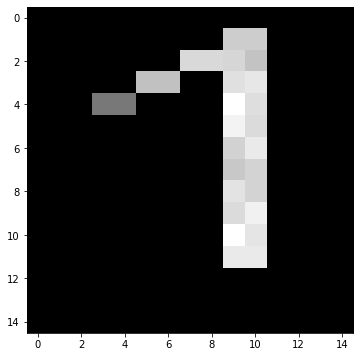

In [2]:
img_one = np.zeros([15, 15])
img_one[ 2:3, 7:11] = 90
img_one[ 3:4, 5:7] = 80 
img_one[ 4:5, 3:5] = 50 
img_one[ 1:12, 9:11] = 110 - np.random.randint(30, size=(11, 2))
print(img_one)
plt.figure('object', figsize=(10,6))
plt.imshow(img_one, cmap='gray')

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.]
 [  0.   0.  85.  77.  97.  95.  94.  90.  88.  96.  91.  98.  98.   0.
    0.]
 [  0.   0.  79.   0.   0.   0.   0.   0.   0.   0.   0.   0.  81.   0.
    0.]
 [  0.   0. 100.   0.   0.   0.   0.   0.   0.   0.   0.   0.  86.   0.
    0.]
 [  0.   0.  80.   0.   0.   0.   0.   0.   0.   0.   0.   0.  93.   0.
    0.]
 [  0.   0.  85.   0.   0.   0.   0.   0.   0.   0.   0.   0. 100.   0.
    0.]
 [  0.   0.  89.   0.   0.   0.   0.   0.   0.   0.   0.   0.  86.   0.
    0.]
 [  0.   0.  82.   0.   0.   0.   0.   0.   0.   0.   0.   0.  78.   0.
    0.]
 [  0.   0.  82.   0.   0.   0.   0.   0.   0.   0.   0.   0.  99.   0.
    0.]
 [  0.   0.  72.   0.   0.   0.   0.   0.   0.   0.   0.   0.  96.   0.
    0.]
 [  0.   0.  84.   0.   0.   0.   0.   0.   0.   0.   0.   0.  90.   0.
    0.]
 [  0.   0.  95.  88.  82.  90.  98.  95

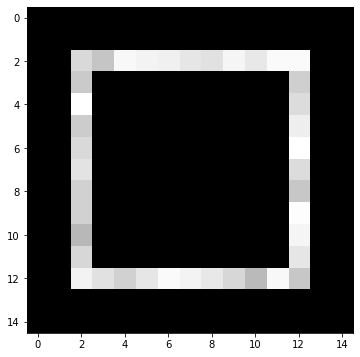

In [3]:
img_not_one = np.zeros([15, 15]) 
img_not_one [ 2:12, 2:3] = 100 - np.random.randint(30, size=(10, 1))
img_not_one [ 2:12, 12:13] = 100 - np.random.randint(30, size=(10, 1))
img_not_one [ 2:3, 2:13] = 100 - np.random.randint(30, size=(1, 11))
img_not_one [ 12:13, 2:13] = 100 - np.random.randint(30, size=(1, 11))
print(img_not_one)
plt.figure('object', figsize=(10,6))
plt.imshow(img_not_one , cmap='gray')

### Images are unrealistic, we can perform Morphological Image Operation to provide more realistic images

However morphological opening is defined in skimage module, we can performe that from scratch as erosion of dilation of image as define in "Morphological Image Analysis" Pierre Soile 

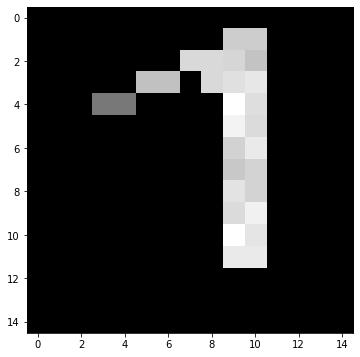

In [4]:
img_one = skimage.morphology.erosion(skimage.morphology.dilation(img_one))
plt.figure('object', figsize=(10,6))
plt.imshow(img_one , cmap='gray') 

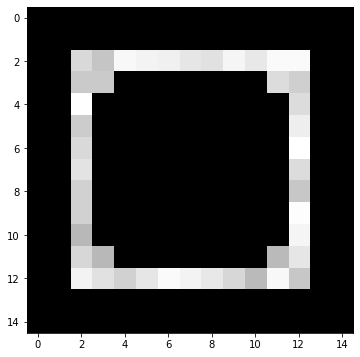

In [5]:
img_not_one = skimage.morphology.closing(img_not_one)
plt.figure('object', figsize=(10,6))
plt.imshow(img_not_one , cmap='gray') 

## Needed Class

In [7]:
class Test_Image:
    def is_one(self):
        #Image declaration
        img_one = np.zeros([15, 15])
        img_one[2:3, 7:11] = 90
        img_one[3:4, 5:7] = 80
        img_one[4:5, 3:5] = 50
        img_one[1:12, 9:11] = 110 - np.random.randint(30, size=(11, 2))
        # To make Image more realistic we performe erosion of dilation of image
        img_one = skimage.morphology.erosion(skimage.morphology.dilation(img_one))
        return img_one
    def is_not_one(self):
        # Image declaration
        img_not_one = np.zeros([15, 15])
        img_not_one[2:12, 2:3] = 100 - np.random.randint(30, size=(10, 1))
        img_not_one[2:12, 12:13] = 100 - np.random.randint(30, size=(10, 1))
        img_not_one[2:3, 2:13] = 100 - np.random.randint(30, size=(1, 11))
        img_not_one[12:13, 2:13] = 100 - np.random.randint(30, size=(1, 11))
        # To make Image more realistic we performe erosion of dilation of image
        img_not_one = skimage.morphology.closing(img_not_one)
        return img_not_one